In [1]:
#importing libraraies
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
class VGGNet(nn.Module):
    def __init__(self, num_classes=10):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),  # Output: 32x32x64
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # Output: 32x32x64
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 16x16x64

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Output: 16x16x128
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # Output: 16x16x128
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 8x8x128

            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # Output: 8x8x256
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # Output: 8x8x256
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 4x4x256
        )

        # Compute the flattened feature size after convolutions and pooling
        self._to_linear = None
        self._initialize_flattened_size()

        self.classifier = nn.Sequential(
            nn.Linear(self._to_linear, 1024),  # Adjusted based on dynamic size computation
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, num_classes)
        )

    def _initialize_flattened_size(self):
        # Initialize to compute the output size of the features dynamically
        with torch.no_grad():
            x = torch.randn(1, 1, 32, 32)  # Batch size=1, Channels=1, Height=32, Width=32
            x = self.features(x)
            self._to_linear = x.view(x.size(0), -1).shape[1]  # Flatten and get size

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x

MNIST

Epoch 1/10
Training Loss: 0.3987
Test Accuracy: 98.57%
Epoch 2/10
Training Loss: 0.0632
Test Accuracy: 99.11%
Epoch 3/10
Training Loss: 0.0492
Test Accuracy: 99.13%
Epoch 4/10
Training Loss: 0.0379
Test Accuracy: 99.23%
Epoch 5/10
Training Loss: 0.0349
Test Accuracy: 99.26%
Epoch 6/10
Training Loss: 0.0303
Test Accuracy: 99.26%
Epoch 7/10
Training Loss: 0.0262
Test Accuracy: 99.19%
Epoch 8/10
Training Loss: 0.0261
Test Accuracy: 99.13%
Epoch 9/10
Training Loss: 0.0255
Test Accuracy: 99.14%
Epoch 10/10
Training Loss: 0.0217
Test Accuracy: 99.38%

Final Metrics for MNIST using VGG-like Network:
Accuracy: 99.38%
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


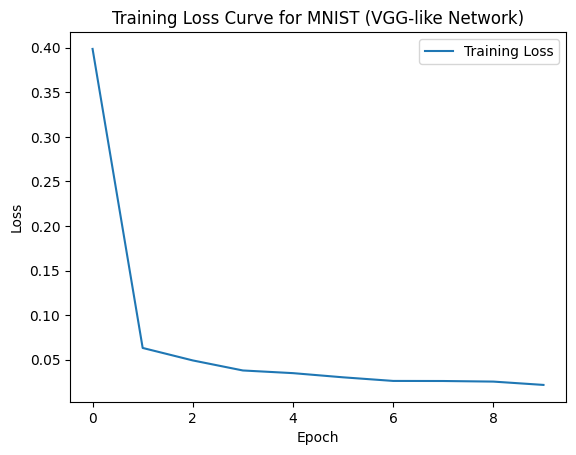

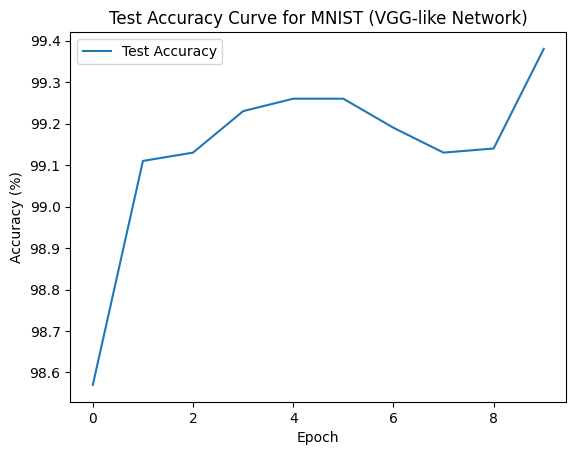

In [5]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize Model, Loss Function, Optimizer
model = VGGNet(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Evaluation
num_epochs = 10
train_loss_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    # Training
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_loss_list.append(train_loss)
    print(f'Training Loss: {train_loss:.4f}')

    # Testing
    model.eval()
    correct = 0
    total = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracy_list.append(accuracy)
    print(f'Test Accuracy: {accuracy:.2f}%')

# Final Metrics Calculation
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print Final Metrics
print("\nFinal Metrics for MNIST using VGG-like Network:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Training Loss Curve
plt.figure()
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve for MNIST (VGG-like Network)')
plt.legend()
plt.show()

# Plot Test Accuracy Curve
plt.figure()
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve for MNIST (VGG-like Network)')
plt.legend()
plt.show()

FMNIST

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.8MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 177kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.24MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.69MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch 1/10
Training Loss: 0.5748
Test Accuracy: 87.14%
Epoch 2/10
Training Loss: 0.3126
Test Accuracy: 89.42%
Epoch 3/10
Training Loss: 0.2605
Test Accuracy: 90.41%
Epoch 4/10
Training Loss: 0.2288
Test Accuracy: 90.93%
Epoch 5/10
Training Loss: 0.2060
Test Accuracy: 91.95%
Epoch 6/10
Training Loss: 0.1875
Test Accuracy: 91.81%
Epoch 7/10
Training Loss: 0.1731
Test Accuracy: 91.30%
Epoch 8/10
Training Loss: 0.1597
Test Accuracy: 91.81%
Epoch 9/10
Training Loss: 0.1474
Test Accuracy: 92.01%
Epoch 10/10
Training Loss: 0.1413
Test Accuracy: 92.01%

Final Metrics for FMNIST using VGG-like Network:
Accuracy: 92.01%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


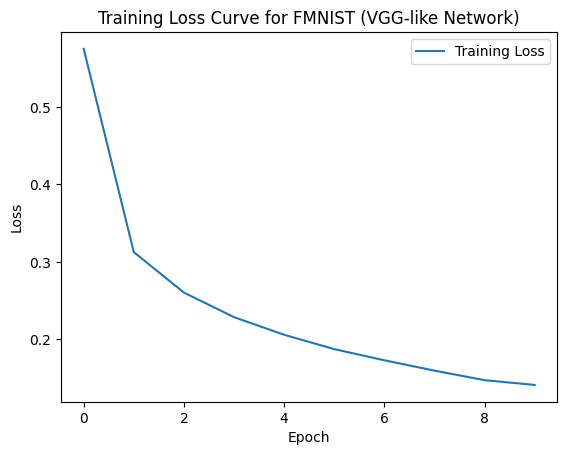

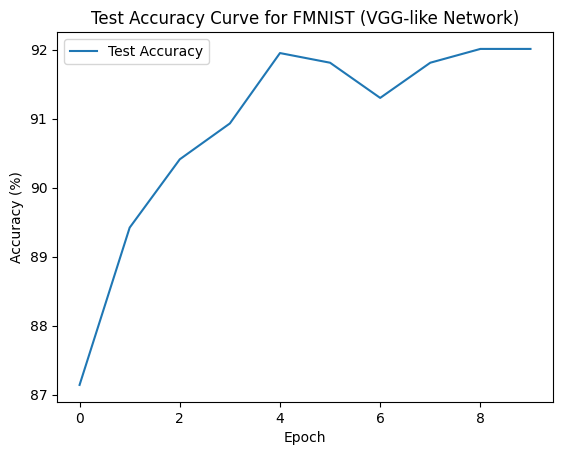

In [6]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize Model, Loss Function, Optimizer
model = VGGNet(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Evaluation
num_epochs = 10
train_loss_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    # Training
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_loss_list.append(train_loss)
    print(f'Training Loss: {train_loss:.4f}')

    # Testing
    model.eval()
    correct = 0
    total = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracy_list.append(accuracy)
    print(f'Test Accuracy: {accuracy:.2f}%')

# Final Metrics Calculation
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print Final Metrics
print("\nFinal Metrics for FMNIST using VGG-like Network:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Training Loss Curve
plt.figure()
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve for FMNIST (VGG-like Network)')
plt.legend()
plt.show()

# Plot Test Accuracy Curve
plt.figure()
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve for FMNIST (VGG-like Network)')
plt.legend()
plt.show()

CIFAR-10

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20
Training Loss: 1.7548
Test Accuracy: 47.47%
Epoch 2/20
Training Loss: 1.2975
Test Accuracy: 60.17%
Epoch 3/20
Training Loss: 1.0623
Test Accuracy: 66.29%
Epoch 4/20
Training Loss: 0.9335
Test Accuracy: 70.01%
Epoch 5/20
Training Loss: 0.8462
Test Accuracy: 72.82%
Epoch 6/20
Training Loss: 0.7813
Test Accuracy: 73.28%
Epoch 7/20
Training Loss: 0.7340
Test Accuracy: 75.75%
Epoch 8/20
Training Loss: 0.7092
Test Accuracy: 76.62%
Epoch 9/20
Training Loss: 0.6785
Test Accuracy: 78.46%
Epoch 10/20
Training Loss: 0.6529
Test Accuracy: 79.84%
Epoch 11/20
Training Loss: 0.6373
Test Accuracy: 78.59%
Epoch 12/20
Training Loss: 0.6147
Test Accuracy: 80.03%
Epoch 13/20
Training Loss: 0.6059
Test Accuracy: 80.39%
Epoch 14/20
Training Loss: 0.5903
Test Accuracy: 79.67%
Epoch 15/20
Training Loss: 0.5832
Test Accuracy: 80.71%
Epoch 16/20
Training Loss: 0.5726
Test Accuracy: 80.34%
Epoch 17/20
Training Loss: 0.5620
Tes

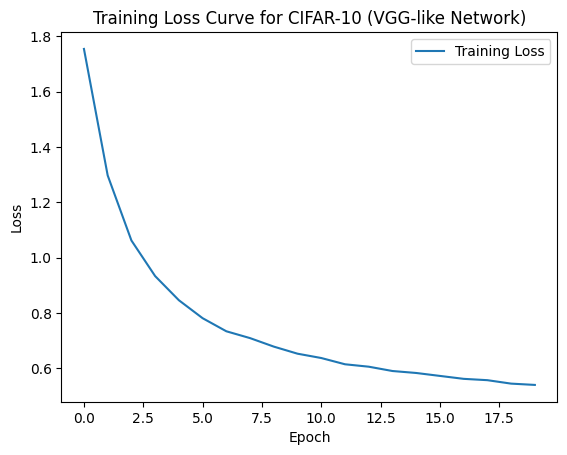

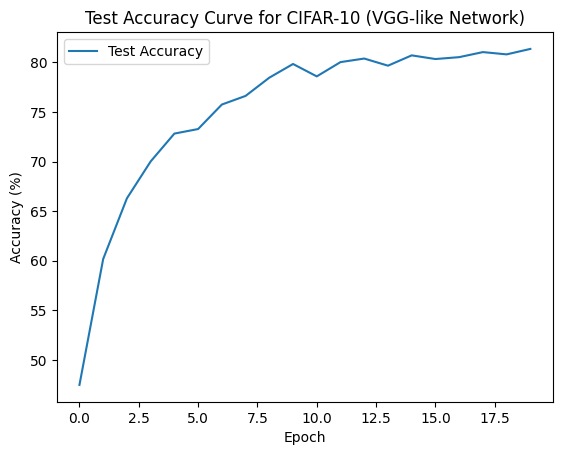

In [9]:
class VGGNet(nn.Module):
    def __init__(self, num_classes=10):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),  # Input: 32x32x3 -> Output: 32x32x64
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),  # Output: 32x32x64
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 16x16x64

            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Output: 16x16x128
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),  # Output: 16x16x128
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 8x8x128

            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # Output: 8x8x256
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),  # Output: 8x8x256
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 4x4x256
        )

        # Compute the flattened feature size after convolutions and pooling
        self._to_linear = None
        self._initialize_flattened_size()

        self.classifier = nn.Sequential(
            nn.Linear(self._to_linear, 1024),  # Adjusted based on dynamic size computation
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, num_classes)
        )

    def _initialize_flattened_size(self):
        # Initialize to compute the output size of the features dynamically
        with torch.no_grad():
            x = torch.randn(1, 3, 32, 32)  # Batch size=1, Channels=3, Height=32, Width=32
            x = self.features(x)
            self._to_linear = x.view(x.size(0), -1).shape[1]  # Flatten and get size

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x


# Data Transformations and CIFAR-10 Dataset
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize RGB images
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize Model, Loss Function, Optimizer
model = VGGNet(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Evaluation
num_epochs = 20
train_loss_list = []
test_accuracy_list = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    # Training
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_loss_list.append(train_loss)
    print(f'Training Loss: {train_loss:.4f}')

    # Testing
    model.eval()
    correct = 0
    total = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    test_accuracy_list.append(accuracy)
    print(f'Test Accuracy: {accuracy:.2f}%')

# Final Metrics Calculation
accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print Final Metrics
print("\nFinal Metrics for CIFAR-10 using VGG-like Network:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot Training Loss Curve
plt.figure()
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve for CIFAR-10 (VGG-like Network)')
plt.legend()
plt.show()

# Plot Test Accuracy Curve
plt.figure()
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve for CIFAR-10 (VGG-like Network)')
plt.legend()
plt.show()